# Result analysis

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plot style
sns.set_style('whitegrid')

In [2]:
%matplotlib inline  

## Load dataset

In [3]:
df = pd.read_csv("data-policy-results.csv")

In [4]:
df.head()

,No,Policy type,5 years ago,Sharing mode,Adopt AEA
0,1,Require,No,Data repository,Yes
1,2,Require,Yes,Journal website,Yes
2,3,Require,Yes,Journal website,Yes
3,4,Require,Yes,Journal website,No
4,5,Require,No,Journal website,Yes


## First look

Text(0.5,1,u'Data policy type')

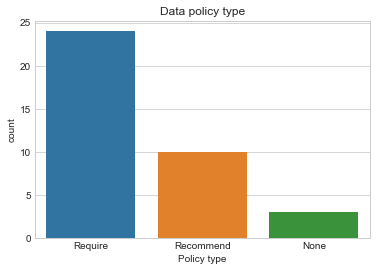

In [5]:
ax = sns.countplot(x='Policy type', data=df)
ax.set_title("Data policy type")

(-1.117271823092332,
 1.2522143553835146,
 -1.1103486940414884,
 1.105134730675906)

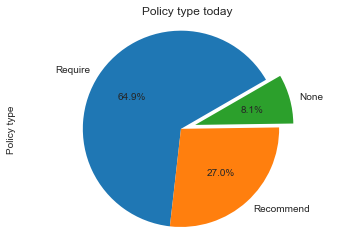

In [86]:
# same thing in pie plot
a = df['Policy type'].value_counts()
a.plot.pie(y=a.index,
           shadow=False,
           explode=(0, 0, 0.15),   
           startangle=30,
           autopct='%1.1f%%',
           title ="Policy type today")
plt.axis('equal')

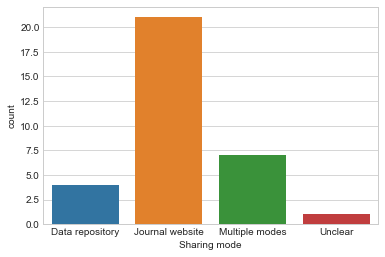

In [6]:
sns.countplot(x='Sharing mode', data=df)

Text(0.5,1,u'Presence of data policies 5 years ago')

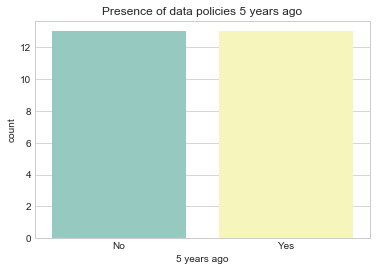

In [7]:
ax = sns.countplot(x='5 years ago', data=df, palette="Set3")
ax.set_title("Presence of data policies 5 years ago")

## More informative plots

In [8]:
df.head()

,No,Policy type,5 years ago,Sharing mode,Adopt AEA
0,1,Require,No,Data repository,Yes
1,2,Require,Yes,Journal website,Yes
2,3,Require,Yes,Journal website,Yes
3,4,Require,Yes,Journal website,No
4,5,Require,No,Journal website,Yes


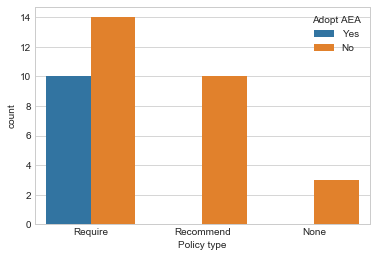

In [9]:
sns.countplot(x='Policy type', hue='Adopt AEA', data=df)

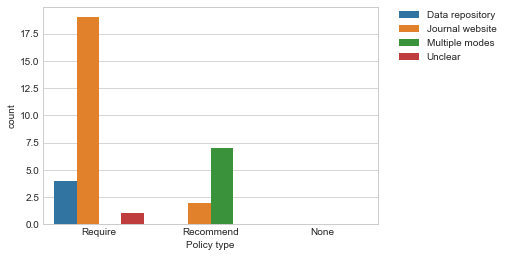

In [10]:
sns.countplot(x='Policy type', hue='Sharing mode', data=df)
# move legend out
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

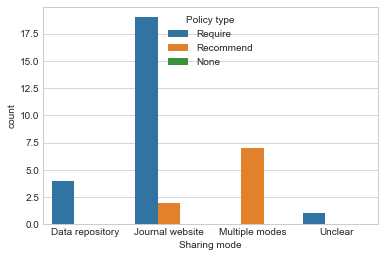

In [11]:
sns.countplot(x='Sharing mode', hue='Policy type', data=df)

## Compare status now and 5 years ago

In [12]:
# create new column to indicate if the policy exists today

# this is a helper method 
def policy_exist (row):
   if row['Policy type'] == 'Require':
      return 'Yes'
   if row['Policy type'] == 'Recommend':
      return 'Yes'
   return 'No'

# this creates a new column which says 'Yes' if the policy exists now
# and says 'No' if the policy doesn't exist
df['Policy'] = df.apply (lambda row: policy_exist (row), axis = 1)

In [13]:
df.head(10) # we can see the change here

,No,Policy type,5 years ago,Sharing mode,Adopt AEA,Policy
0,1,Require,No,Data repository,Yes,Yes
1,2,Require,Yes,Journal website,Yes,Yes
2,3,Require,Yes,Journal website,Yes,Yes
3,4,Require,Yes,Journal website,No,Yes
4,5,Require,No,Journal website,Yes,Yes
5,6,Recommend,NaN,Journal website,No,Yes
6,7,None,NaN,NaN,No,No
7,8,Require,Yes,Journal website,No,Yes
8,9,Recommend,No,NaN,No,Yes
9,10,Recommend,No,Multiple modes,No,Yes


Text(0.5,1,u'No of journals that have and do not have data policies')

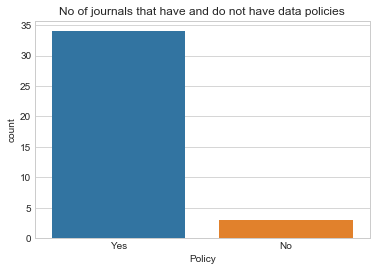

In [14]:
ax = sns.countplot(x='Policy', data=df)
ax.set_title('No of journals that have and do not have data policies')

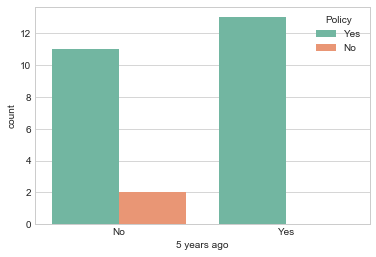

In [15]:
sns.countplot(x='5 years ago', hue='Policy', data=df, palette="Set2")

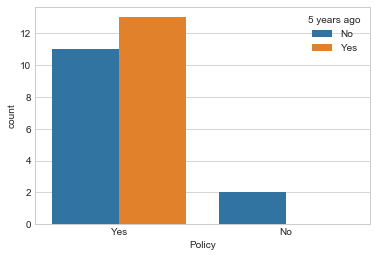

In [16]:
sns.countplot(x='Policy', hue='5 years ago', data=df)

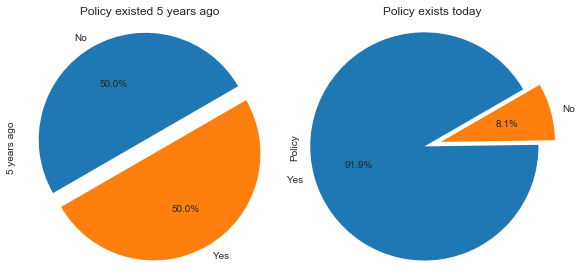

In [17]:
fig = plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
a = df['5 years ago'].value_counts()
a.plot.pie(y=a.index,
           shadow=False,
           explode=(0, 0.15),   
           startangle=30,
           autopct='%1.1f%%',
           title ="Policy existed 5 years ago")

plt.axis('equal')
plt.tight_layout()

plt.subplot(1, 2, 2)
b = df['Policy'].value_counts()
b.plot.pie(y=b.index,
           shadow=False,
           explode=(0, 0.15),   
           startangle=30,
           autopct='%1.1f%%',
           title ="Policy exists today")

plt.axis('equal')
plt.tight_layout()

In [18]:
a

No     13
Yes    13
Name: 5 years ago, dtype: int64

## Presents the difference from 5 years ago to today

In [23]:
gr = df.groupby(['5 years ago','Policy']).size().reset_index().rename(columns={0:'count'})
gr

,5 years ago,Policy,count
0,No,No,2
1,No,Yes,11
2,Yes,Yes,13


In [72]:
from matplotlib.sankey import Sankey

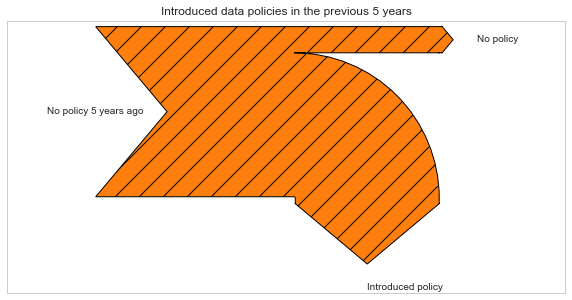

In [78]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[], title="Introduced data policies in the previous 5 years")

# hardcoded from the above
flows = [13, -2,-11]
labels = ["No policy 5 years ago", "No policy", "Introduced policy"]
sankey = Sankey(ax=ax, unit=None, offset=1.8, color='green')

sankey.add(flows=flows, 
           labels=labels,
           pathlengths = [.5,.2,.5],
           orientations=[0, 0,-1],
           trunklength=15)

diagrams = sankey.finish()
diagrams[-1].patch.set_hatch('/')

# align text left
for d in diagrams:
    for t in d.texts:
        t.set_horizontalalignment('left')
d.texts[0].set_horizontalalignment('right')